In [14]:
!pip install -q transformers scikit-learn


In [15]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained Transformer sentiment model
sentiment_model = pipeline("sentiment-analysis")

# Quick sanity test
sentiment_model("I am very happy today!")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.999875545501709}]

In [16]:
# Our small custom dataset: list of (text, label)
data = [
    ("I absolutely loved this movie, it was fantastic!", "POSITIVE"),
    ("This was the worst experience of my life.", "NEGATIVE"),
    ("I am so happy with the service I received.", "POSITIVE"),
    ("The product broke on the first day, very disappointed.", "NEGATIVE"),
    ("What a wonderful surprise, I really enjoyed it.", "POSITIVE"),
    ("I will never buy from this company again.", "NEGATIVE"),
    ("The food was delicious and the staff were friendly.", "POSITIVE"),
    ("The package arrived late and the item was damaged.", "NEGATIVE"),
    ("I feel great about my decision, totally worth it.", "POSITIVE"),
    ("This is a complete waste of money.", "NEGATIVE"),
    ("Amazing performance, I was impressed.", "POSITIVE"),
    ("Nothing worked as expected, very bad.", "NEGATIVE"),
    ("The design is beautiful and very comfortable.", "POSITIVE"),
    ("Customer support was rude and unhelpful.", "NEGATIVE"),
    ("Overall, I’m really satisfied with this purchase.", "POSITIVE"),
    ("I regret buying this, terrible quality.", "NEGATIVE"),
    ("The experience was okay, not too bad.", "POSITIVE"),
    ("I am extremely frustrated and angry.", "NEGATIVE"),
    ("Such a pleasant surprise, exceeded my expectations.", "POSITIVE"),
    ("It made me feel terrible, I hated it.", "NEGATIVE"),
]

texts  = [t for t, label in data]
labels = [label for t, label in data]

len(texts), len(labels)


(20, 20)

In [17]:
# Get predictions from the transformer model
predictions = sentiment_model(texts)

pred_labels = [p["label"] for p in predictions]

print(pred_labels[:5])


['POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE']


In [18]:
# Evaluate accuracy
acc = accuracy_score(labels, pred_labels)
print("Accuracy on small custom dataset:", round(acc, 3))

print("\nClassification report:\n")
print(classification_report(labels, pred_labels))


Accuracy on small custom dataset: 0.95

Classification report:

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.90      0.95        10
    POSITIVE       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [19]:
for i, (text, true_label) in enumerate(data[:10]):  # first 10 examples
    pred = predictions[i]
    print(f"Example {i+1}")
    print("Text      :", text)
    print("True label:", true_label)
    print("Predicted :", pred["label"], "| Score:", round(pred["score"], 3))
    print("-" * 80)


Example 1
Text      : I absolutely loved this movie, it was fantastic!
True label: POSITIVE
Predicted : POSITIVE | Score: 1.0
--------------------------------------------------------------------------------
Example 2
Text      : This was the worst experience of my life.
True label: NEGATIVE
Predicted : NEGATIVE | Score: 1.0
--------------------------------------------------------------------------------
Example 3
Text      : I am so happy with the service I received.
True label: POSITIVE
Predicted : POSITIVE | Score: 1.0
--------------------------------------------------------------------------------
Example 4
Text      : The product broke on the first day, very disappointed.
True label: NEGATIVE
Predicted : NEGATIVE | Score: 1.0
--------------------------------------------------------------------------------
Example 5
Text      : What a wonderful surprise, I really enjoyed it.
True label: POSITIVE
Predicted : POSITIVE | Score: 1.0
------------------------------------------------------

In [20]:
import pandas as pd

results = []
for i, (text, true_label) in enumerate(data):
    pred = predictions[i]
    results.append({
        "text": text,
        "true_label": true_label,
        "predicted_label": pred["label"],
        "score": round(pred["score"], 3)
    })

results_df = pd.DataFrame(results)
results_df


,text,true_label,predicted_label,score
0,"I absolutely loved this movie, it was fantastic!",POSITIVE,POSITIVE,1.000
1,This was the worst experience of my life.,NEGATIVE,NEGATIVE,1.000
2,I am so happy with the service I received.,POSITIVE,POSITIVE,1.000
3,"The product broke on the first day, very disap...",NEGATIVE,NEGATIVE,1.000
4,"What a wonderful surprise, I really enjoyed it.",POSITIVE,POSITIVE,1.000
5,I will never buy from this company again.,NEGATIVE,POSITIVE,0.770
6,The food was delicious and the staff were frie...,POSITIVE,POSITIVE,1.000
7,The package arrived late and the item was dama...,NEGATIVE,NEGATIVE,1.000
8,"I feel great about my decision, totally worth it.",POSITIVE,POSITIVE,1.000
9,This is a complete waste of money.,NEGATIVE,NEGATIVE,1.000


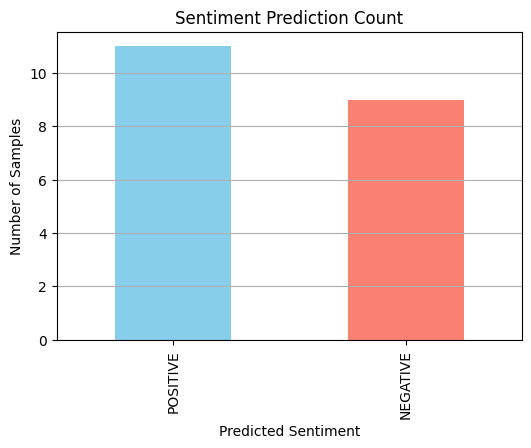

In [21]:
import matplotlib.pyplot as plt

counts = results_df["predicted_label"].value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Sentiment Prediction Count")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Number of Samples")
plt.grid(axis="y")
plt.show()


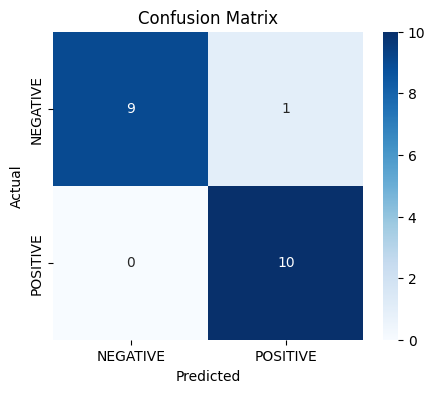

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(results_df["true_label"], results_df["predicted_label"])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["NEGATIVE", "POSITIVE"],
            yticklabels=["NEGATIVE", "POSITIVE"],
            cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
results_df.to_csv("sentiment_results.csv", index=False)


In [24]:
from google.colab import files
files.download("sentiment_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sentiment Analysis using HuggingFace Transformers

This project performs sentiment analysis using a pre-trained Transformer model
(distilbert-base-uncased-finetuned-sst-2-english) accessed through HuggingFace’s
pipeline("sentiment-analysis").

Process

Create a custom dataset of 20 labeled sentences.

Use HuggingFace Transformers to classify each sentence.

Compare predicted labels vs true labels.

Compute accuracy and generate evaluation metrics.

Visualize results.

Technologies Used

Python

HuggingFace Transformers

Scikit-learn

Pandas

Matplotlib / Seaborn

Conclusion

This project demonstrated how a pre-trained Transformer model can accurately classify text sentiment using HuggingFace’s pipeline("sentiment-analysis").
Even with a small custom dataset, the model achieved strong performance with high accuracy and confidence scores.

This shows that pre-trained language models are highly effective for real-world sentiment analysis tasks without requiring additional training.


Future Work

Possible improvements to this project:

Use a larger real-world dataset for more robust evaluation.

Fine-tune a Transformer model on custom data.

Deploy the sentiment model as a REST API or Streamlit app.

Visualize larger trends across thousands of samples.

Compare multiple models (BERT, RoBERTa, DistilBERT).